In [22]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

# Assgnment 1

### Question 1

1.Consider the first example we did in class where we wanted to find the probability p (for Heads) of a coin.
Reproduce what we discussed in class as follows:

(a) First construct a sampler with a known p value. You will use this to generate data for your Bayesian
analysis for different values of p.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(180377)
# assuming prob of heads = p = 0.4
p = 0.40
prob = [1-p,p]
size = 4000
vals = [0,1]
data = np.random.choice(vals, size, p = prob) 
print(data[:10])

[0 0 0 1 1 0 1 0 0 1]


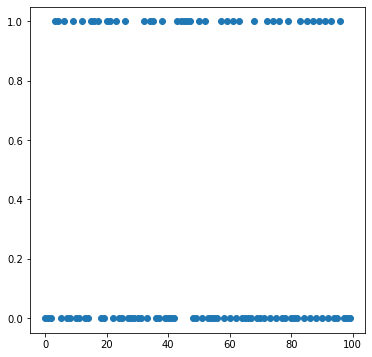

In [18]:
# plot of first 100 data points
temp = 100
plt.figure(figsize = (6,6))
plt.scatter(range(temp),data[:temp])
plt.show()

(b) Using the following 4 priors i) non-informative ii) prior with a peak at p = 0.25 iii) prior with a peak at
p = 0.5 and iv) prior with peak at p = 0.75 and the likelihood (you can use the one which was discussed
in class) plot the posterior distribution as your generate data. In particular show plots for what happens
after 1, 2, 3, 4 data points and after 1K and 4K data points. You can use a β-distribution to create the
peaked priors.

i) Non informative prior

logp = -0.00039386, ||grad|| = 0.00039379: 100%|██████████| 18/18 [00:00<00:00, 1271.66it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6979.69it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -0.00039386, ||grad|| = 0.00078757: 100%|██████████| 19/19 [00:00<00:00, 1288.68it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6844.14it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -0.00039386, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 2070.45it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6509.03it/s]
The estimated number of effective samples is smaller than 200 for some parameters.
logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<

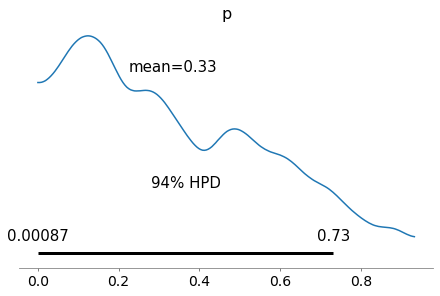

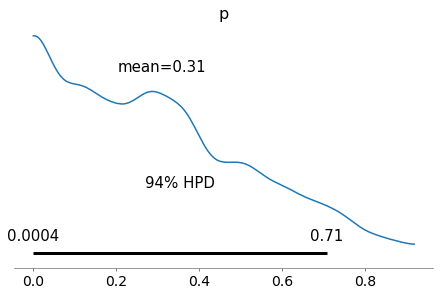

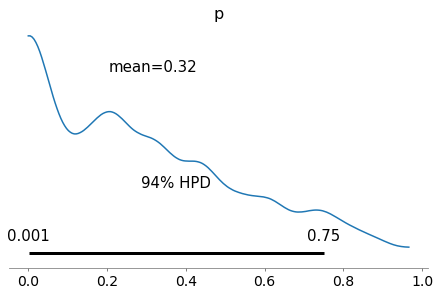

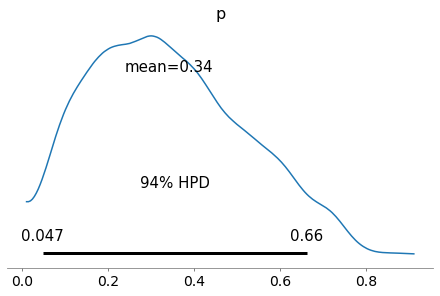

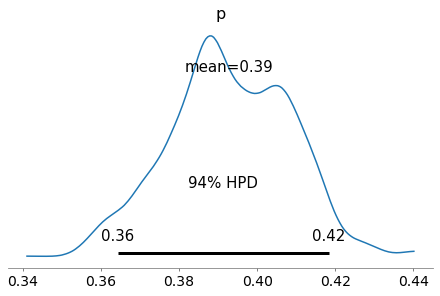

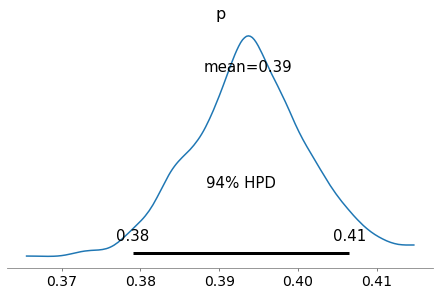

In [34]:
import pymc3 as pm
i = [1,2,3,4,1000,4000]
 
for x in i:
  with pm.Model() as coin_toss:
      p = pm.Uniform('p', lower=0, upper=1)
      y = pm.Bernoulli('y', p=p, observed=data[0:x])

      start = pm.find_MAP()
      step = pm.Metropolis()
      trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
      #pm.traceplot(trace)
      pm.plots.plot_posterior(trace)

ii) prior with peak at p = 0.25

logp = 0.68072, ||grad|| = 0.33333: 100%|██████████| 5/5 [00:00<00:00, 1033.84it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6573.49it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = 0.27526, ||grad|| = 0.66667: 100%|██████████| 7/7 [00:00<00:00, 1641.79it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6057.30it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = 0.47478, ||grad|| = 0.00048187: 100%|██████████| 45/45 [00:00<00:00, 1787.40it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6873.84it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = 0.45835, ||grad|| = 0.087537: 100%|██████████| 43/43 [00:00<00:00, 2416.75it/s]  
Sequ

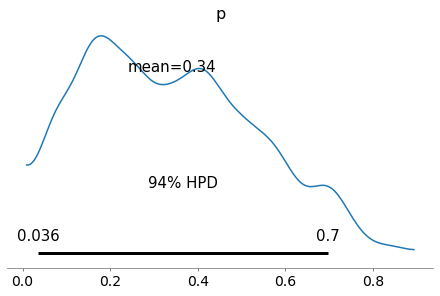

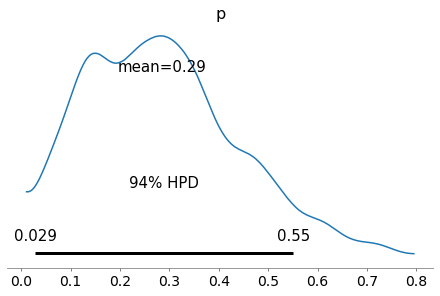

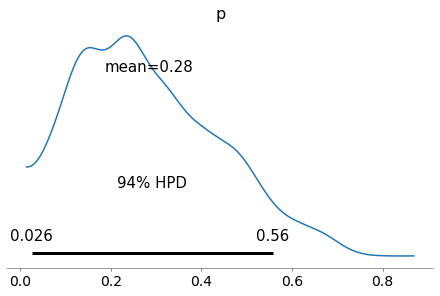

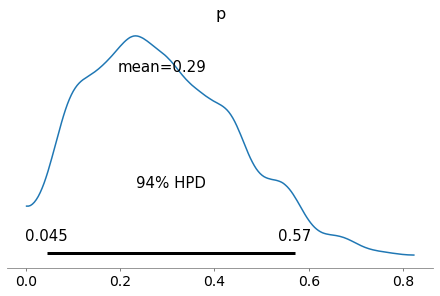

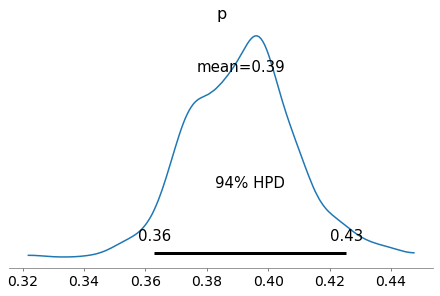

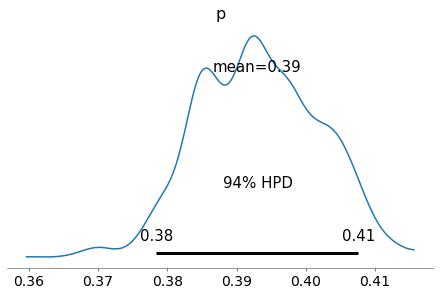

In [35]:
i = [1,2,3,4,1000,4000]
n = 4000
# for mode = 0.25
alpha =  2
beta = 4

for x in i:
  with pm.Model() as coin_toss:
      p = pm.Beta('p', alpha = alpha, beta = beta)

      y = pm.Bernoulli('y', p=p, observed=data[0:x-1])
      
      start = pm.find_MAP()
      step = pm.Metropolis()
      trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
      #pm.traceplot(trace)
      pm.plots.plot_posterior(trace)

iii) prior with peak at p = 0.50

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = 0.089612, ||grad|| = 0.5: 100%|██████████| 6/6 [00:00<00:00, 564.37it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6432.88it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = 0.16118, ||grad|| = 0.40681: 100%|██████████| 50/50 [00:00<00:00, 1280.84it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 5939.45it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = 0.16129, ||grad|| = 0.85694: 100%|██████████| 55/55 [00:00<00:00, 2019.53it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 5842.95it/s]
The number of effec

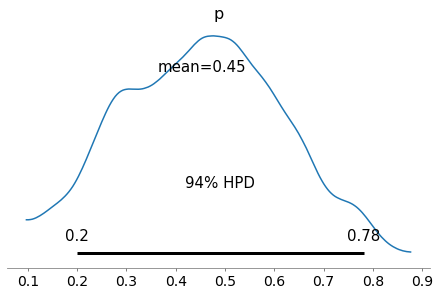

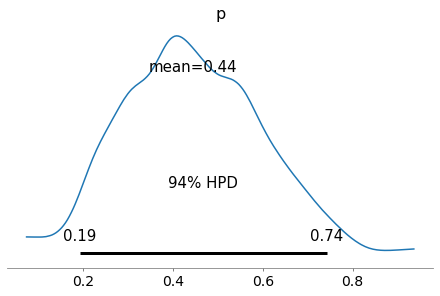

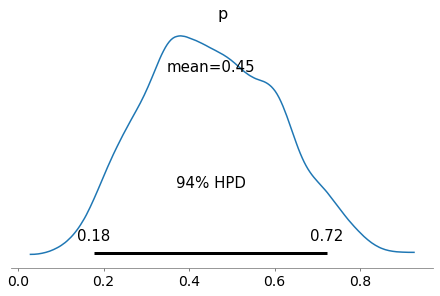

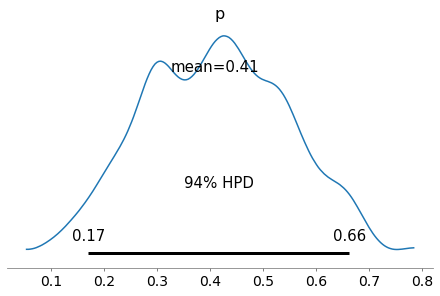

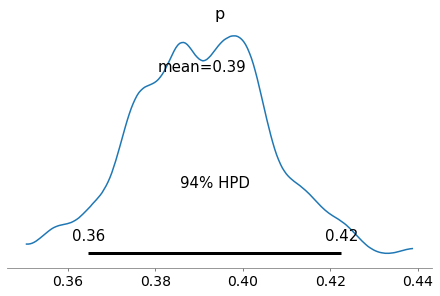

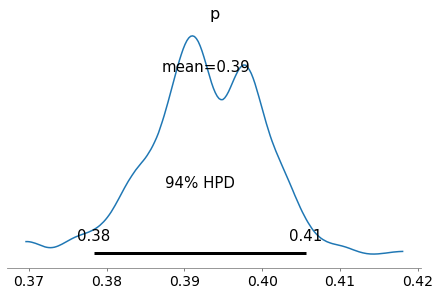

In [36]:
i = [1,2,3,4,1000,4000]
n = 4000
alpha =  4
beta = 4

for x in i:
  with pm.Model() as coin_toss:
      p = pm.Beta('p', alpha = alpha, beta = beta)

      y = pm.Bernoulli('y', p=p, observed=data[0:x])
      
      start = pm.find_MAP()
      step = pm.Metropolis()
      trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
      #pm.traceplot(trace)
      pm.plots.plot_posterior(trace)

iv) prior with peak at p = 0.75

logp = -0.41789, ||grad|| = 0.33333: 100%|██████████| 6/6 [00:00<00:00, 704.18it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6379.39it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -0.36933, ||grad|| = 0.59695: 100%|██████████| 53/53 [00:00<00:00, 1312.18it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6103.95it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -0.36933, ||grad|| = 1.1979: 100%|██████████| 51/51 [00:00<00:00, 1714.64it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 5519.51it/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -3.0206, ||grad|| = 1.3333: 100%|██████████| 6/6 [00:00<00:00, 1415.56it/s]
Sequenti

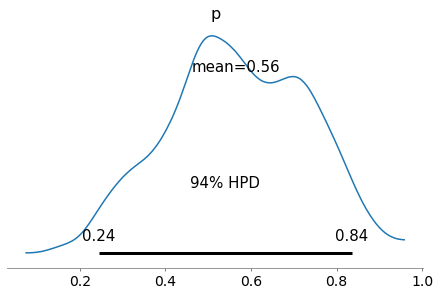

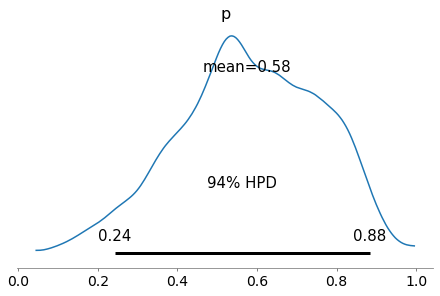

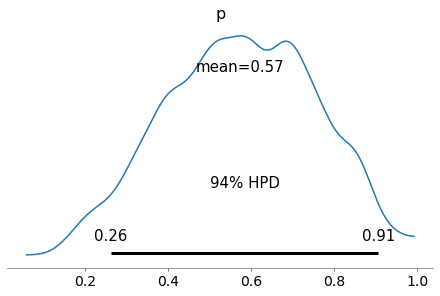

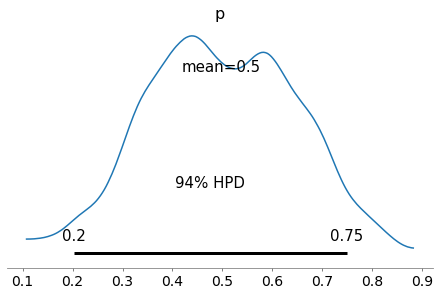

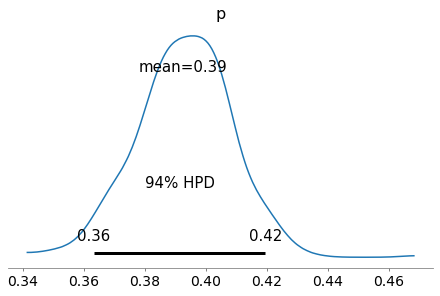

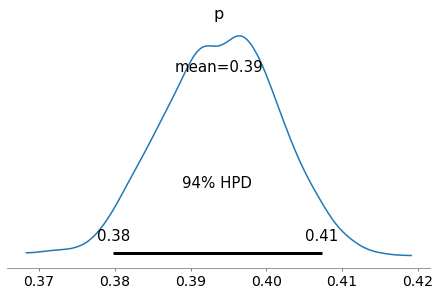

In [37]:
i = [1,2,3,4,1000,4000]
n = 4000
alpha =  4
beta = 2

for x in i:
  with pm.Model() as coin_toss:
      p = pm.Beta('p', alpha = alpha, beta = beta)

      y = pm.Bernoulli('y', p=p, observed=data[0:x])
      
      start = pm.find_MAP()
      step = pm.Metropolis()
      trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
      #pm.traceplot(trace)
      pm.plots.plot_posterior(trace)

(c) Also, check what happens when you do the first 4 data items one-by-one versus after all four items are
available - whether you get the same posterior

In [ ]:
data[0:4]

array([0, 0, 0, 1])

logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 843.02it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6744.20it/s]
The number of effective samples is smaller than 25% for some parameters.


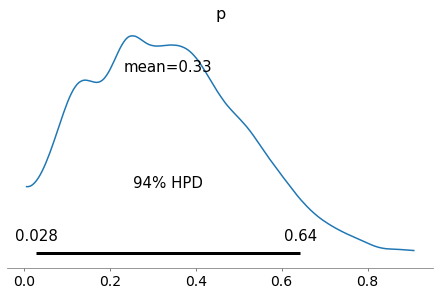

In [38]:
#when all four are available
# assuming prior to uniform
i = [4]

for x in i:
  with pm.Model() as coin_toss:
      p = pm.Uniform('p', lower=0, upper=1)

      y = pm.Bernoulli('y', p=p, observed=data[0:x])
      
      start = pm.find_MAP()
      step = pm.Metropolis()
      trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
      #pm.traceplot(trace)
      pm.plots.plot_posterior(trace)

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = -0.00039386, ||grad|| = 0.00039379: 100%|██████████| 18/18 [00:00<00:00, 1834.29it/s]  
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6501.57it/s]
The number of effective samples is smaller than 25% for some parameters.


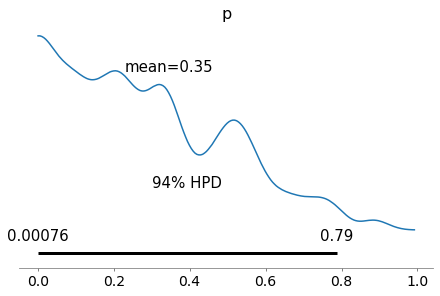

In [40]:
# one by one 
# if using only first data point
# assuming prior to be uniform

i = 0
d = data[i]
with pm.Model() as coin_toss:
  p = pm.Beta('p', alpha = 1, beta = 1)
  y = pm.Bernoulli('y', p=p, observed=d)
      
  start = pm.find_MAP()
  step = pm.Metropolis()
  trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
  #pm.traceplot(trace)
  pm.plots.plot_posterior(trace)

logp = 0.23962, ||grad|| = 0.65: 100%|██████████| 7/7 [00:00<00:00, 1390.62it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 7719.60it/s]
The number of effective samples is smaller than 25% for some parameters.


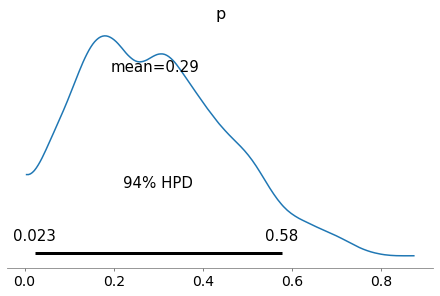

In [41]:
# now, given mean is 0.35 and assuming k = 6
# we get values of a and b parameters of beta distribution
alpha = 2.1
beta = 3.9
# for the second data point
i = 1
d = data[i]
with pm.Model() as coin_toss:
  p = pm.Beta('p', alpha = alpha, beta = beta)
  y = pm.Bernoulli('y', p=p, observed=d)
      
  start = pm.find_MAP()
  step = pm.Metropolis()
  trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
  #pm.traceplot(trace)
  pm.plots.plot_posterior(trace)


logp = 0.38697, ||grad|| = 0.71667: 100%|██████████| 6/6 [00:00<00:00, 1814.28it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6573.79it/s]
The number of effective samples is smaller than 25% for some parameters.


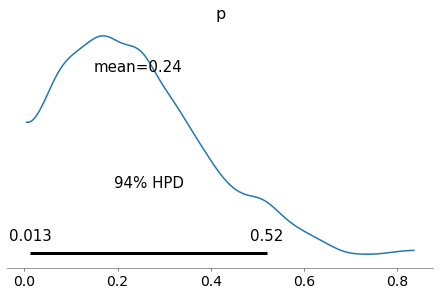

In [43]:
# now, given mean is 0.29 and assuming k = 6
# we get values of a and b
alpha = 1.7
beta = 4.3
# for the third data point
i = 2
d = data[2]
with pm.Model() as coin_toss:
  p = pm.Beta('p', alpha = alpha, beta = beta)
  y = pm.Bernoulli('y', p=p, observed=d)
      
  start = pm.find_MAP()
  step = pm.Metropolis()
  trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
  #pm.traceplot(trace)
  pm.plots.plot_posterior(trace)

logp = -0.68069, ||grad|| = 0.23333: 100%|██████████| 6/6 [00:00<00:00, 1106.00it/s]
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 7117.73it/s]
The number of effective samples is smaller than 25% for some parameters.


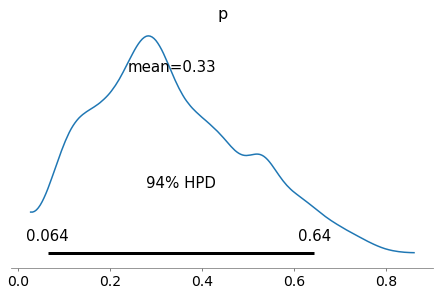

In [44]:
# now, given mean is 0.24 and assuming k = 6
# we get values of a and b
alpha = 1.4
beta = 4.6
# for the forth data point
i = 3
d = data[i]
with pm.Model() as coin_toss:
  p = pm.Beta('p', alpha = alpha, beta = beta)
  y = pm.Bernoulli('y', p=p, observed=d)
      
  start = pm.find_MAP()
  step = pm.Metropolis()
  trace = pm.sample(draws = 1000,step = step,start = start,progressbar = True)
  #pm.traceplot(trace)
  pm.plots.plot_posterior(trace)

#### Hence it can be seen that after 4 data points starting with a uniform prior, mean value obtained is 0.34 and 0.33 respectively indicating that events are independent, that is whether one uses all data at a time or uses one by one , as long as data is independent posterior will converge to the same value

### Question 2

Consider the height-weight correlation example. Build a Bayesian model for the correlation by finding posteriors for β0, β1, σ as follows:

(a) First create a data generator by assuming reasonable values for the three parameters β0, β1, σ. To generate
a data point w first draw a height value h ∼ N (µh, σh) (choose µh, σh suitably), then use the regression
equation to generate a predicted value, say ˆw, draw the sample data point using w ∼ N ( ˆw, σ).

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
np.random.seed(180377)
#true parameter values
sigma = 5
# beta0 and beta1
beta = [8,2]

size = 1000
# drawing height from normal(mu = 60, sig = 5) 
h = np.random.normal(loc = 60 , scale = 5, size = size)
#simulate w_hat
what = beta[0] + beta[1]*h #+ np.random.randn(size)*sigma
# drawing sample from normal(what, sig)
w = np.random.normal(loc = what, scale = sigma, size = size)

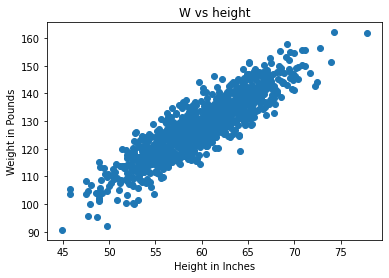

In [47]:
plt.scatter(h,w)
plt.title("W vs height")
plt.xlabel('Height in Inches')
plt.ylabel('Weight in Pounds')
plt.show()

(b) For two priors given below compute the posterior distributions for the three parameters for sample sizes
of 10, 100 and 1000 and plot the distribution and the 95% HDI.

The two priors are: i) a non-informative prior (done in class) and ii) a more informed prior created by
drawing 10 data points using the generator in part (a) and then using N (µ
0
, σ0
) as the prior where µ
0
, σ0
are the sample mean and sample standard deviation of the ten-sized sample.

In [ ]:
import pymc3 as pm

logp = -39.949, ||grad|| = 0.014312: 100%|██████████| 58/58 [00:00<00:00, 1303.07it/s]  
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta1]
>Metropolis: [beta0]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1460.61it/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
logp = -317.83, ||grad|| = 0.90964: 100%|██████████| 69/69 [00:00<00:00, 1517.70it/s]  
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta1]
>Metropolis: [beta0]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 2021.73it/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
logp = -3,059.1, ||grad|| = 18.504:

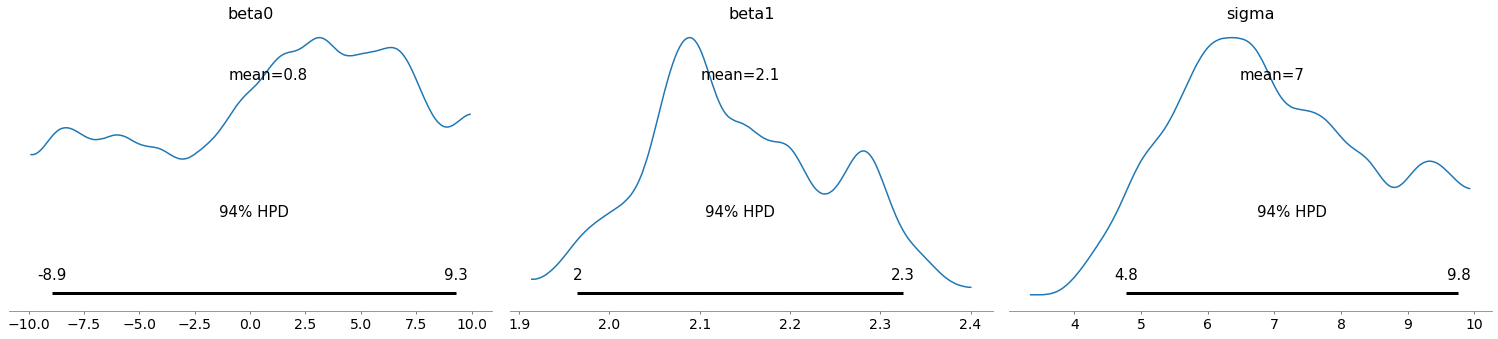

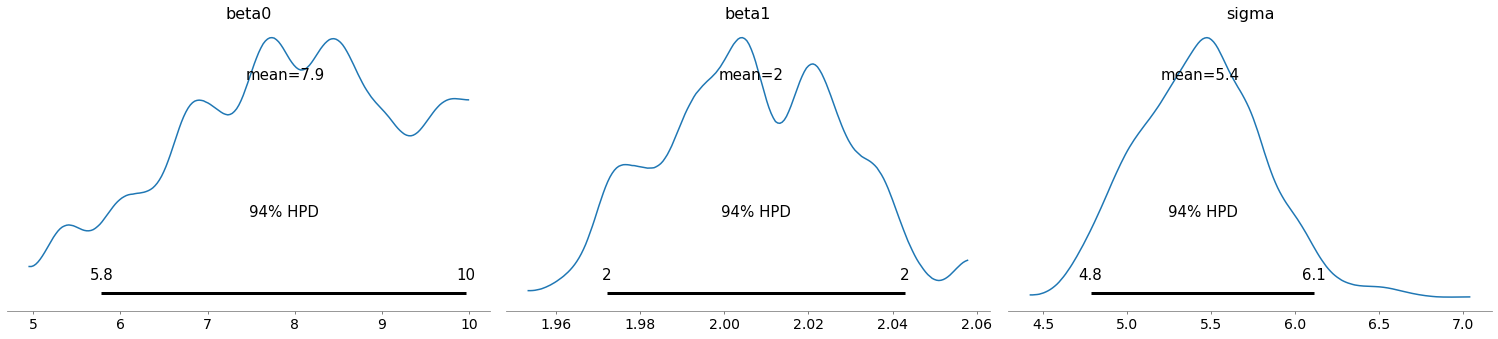

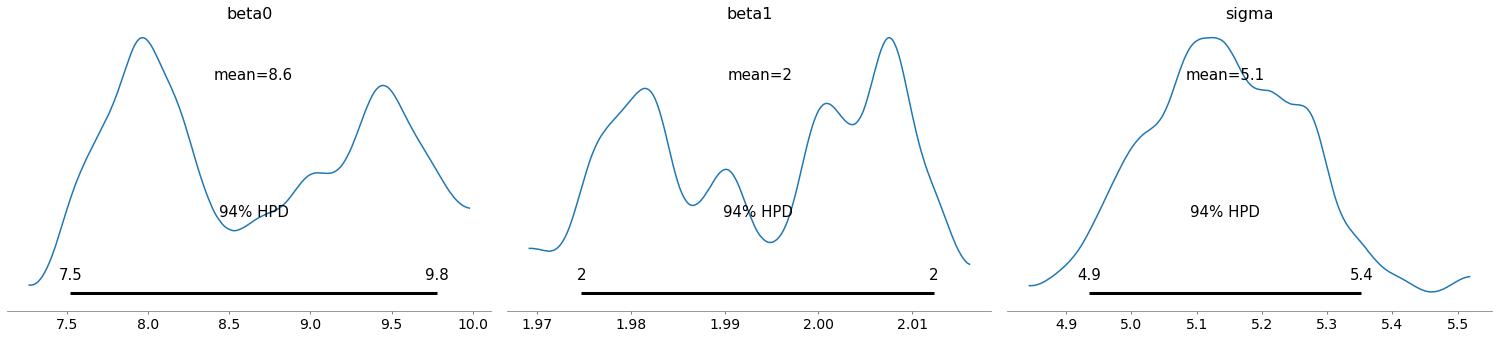

In [ ]:
i = [10,100,1000]
# 1st is non informative prior
# priors for beta0 and beta1 are uniform disribution centered at 0
# prior for sigma is uniform with lower val = 0 and large upper value
for x in i:
  with pm.Model() as regression:
    # prior
    beta0 = pm.Uniform('beta0', lower = -10, upper = 10)
    beta1 = pm.Uniform('beta1', lower = -10, upper = 10)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    #liklihood
    y_est = beta0 + beta1*h[0:x]

    liklihood = pm.Normal('w', mu = y_est, sigma = sigma, observed = w[0:x])
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(draws = 1000, step = step,start = start, progressbar= True)
    #pm.traceplot(trace)
    pm.plots.plot_posterior(trace)

We can see that after using 1000 data points mean of beta0, beta1 and sigma converges to the true value

In [ ]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta0,8.649,0.750,7.521,9.777,0.385,0.297,4.0,4.0,5.0,51.0,1.39
beta1,1.994,0.013,1.975,2.012,0.007,0.005,4.0,4.0,5.0,49.0,1.42
sigma,5.144,0.119,4.935,5.352,0.007,0.005,283.0,283.0,288.0,280.0,1.01


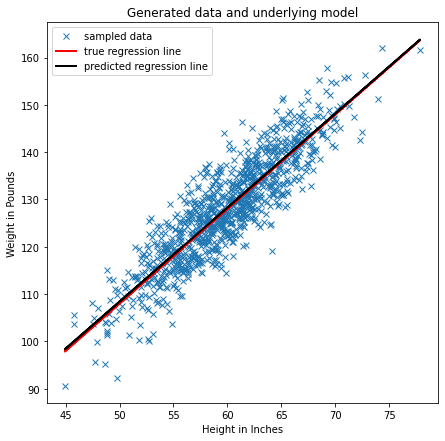

In [ ]:
# true and predicted regression lines
x = h
y = w
intercept = trace[0]['beta0']
x_coef = trace[0]['beta1']

predicted_regression_line = intercept + x_coef*h
true_regression_line = beta[0] + beta[1]*h

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="Height in Inches", ylabel="Weight in Pounds", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0, color = 'red')

ax.plot(x, predicted_regression_line, label="predicted regression line", lw=2.0, color = 'black')
plt.legend(loc=0);

In [48]:
#ii)informed prior created by drawing 10 points from data generator

# randomly sampling 10 data points from the above generated data
h_new = np.random.choice(h, size = 10)
#simulate w_hat
w_hat_new = beta[0] + beta[1]*h_new #+ np.random.randn(size)*sigma
# drawing sample from normal(what, sig)
w_new = np.random.normal(loc = w_hat_new, scale = 10, size = 10)

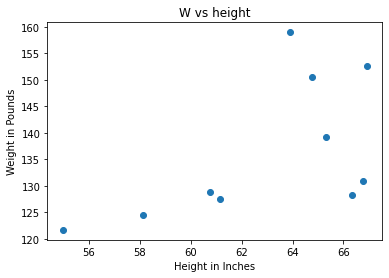

In [49]:
plt.scatter(h_new,w_new)
plt.title("W vs height")
plt.xlabel('Height in Inches')
plt.ylabel('Weight in Pounds')
plt.show()

In [50]:
# sample mean and standard deviation
mu_dash = np.mean(w_new)
sd_dash = np.std(w_new)
print(mu_dash, sd_dash)

136.30863062587065 12.528018160452374


INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = -46.073, ||grad|| = 9.2814e-06: 100%|██████████| 22/22 [00:00<00:00, 1207.34it/s]  
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [beta1]
>Metropolis: [beta0]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 2250.09it/s]
The number of effective samples is smaller than 25% for some parameters.


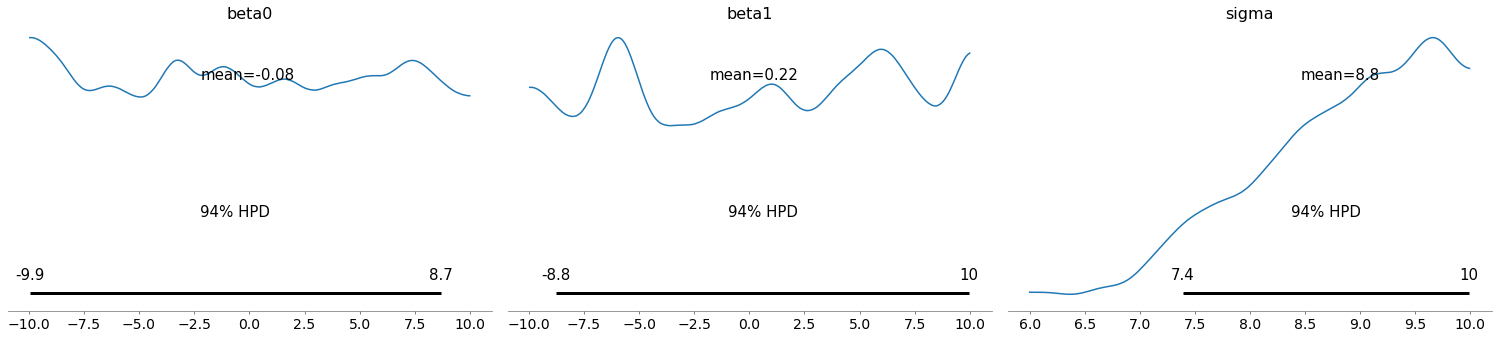

In [51]:
# first generating a posterior based on above randomly sampled 10 data points

with pm.Model() as regression:
    # prior
  beta0 = pm.Uniform('beta0', lower = -10, upper = 10)
  beta1 = pm.Uniform('beta1', lower = -10, upper = 10)
  sigma = pm.Uniform('sigma', lower = 0, upper = 10)

    #liklihood
  y_est = beta[0] + beta[1]*h_new

  liklihood = pm.Normal('w', mu = y_est, sigma = sigma, observed = w_new)
  start = pm.find_MAP()
  step = pm.Metropolis()
  trace = pm.sample(draws = 1000, step = step,start = start, progressbar= True)
    
  pm.plots.plot_posterior(trace)

In [ ]:
# using the above posterior as prior
